In [1]:
using BeamLib
using LinearAlgebra
using MeshGrid

positions = [-14e-2, -10e-2, -6e-2, -2e-2, 2e-2, 6e-2, 10e-2, 14e-2]
pa2D = BeamLib.IsotropicArray(hcat(vec([[a, b] for a in positions, b in positions])...))
pa3D = BeamLib.IsotropicArray(hcat(vec([[a, b, c] for a in positions, b in positions, c in positions])...))
weights_pa2D = BeamLib.dsb_weights(pa2D, 3.75e9, [deg2rad(70), deg2rad(30)])
weights_pa3D = BeamLib.dsb_weights(pa3D, 3.75e9, [deg2rad(70), deg2rad(30)])
fcenter = 3.75e9

3.75e9

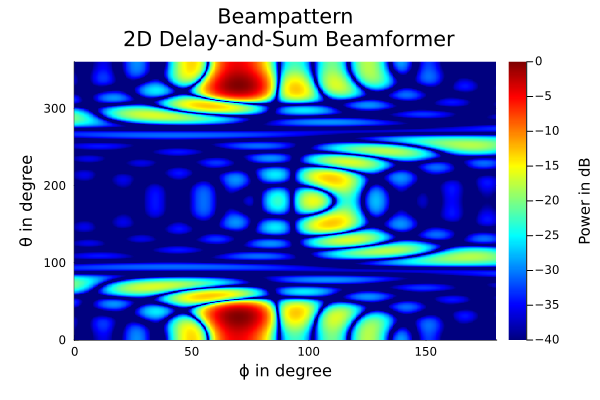

In [2]:
ϕaxis = LinRange(0, 180, 512)
θaxis = LinRange(0, 360, 512)
Φ, Θ = meshgrid(ϕaxis, θaxis)
azel = vcat(vec(Φ)', vec(Θ)')

W = weights_pa2D'*BeamLib.steer(pa2D, fcenter, deg2rad.(azel))
W = reshape(W, length(θaxis), length(ϕaxis))
WdB = 20*log10.(abs.(W))

using Plots
import Measures
p1 = heatmap(ϕaxis,θaxis, WdB, cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\n 2D Delay-and-Sum Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("ϕ in degree")
ylabel!("θ in degree")

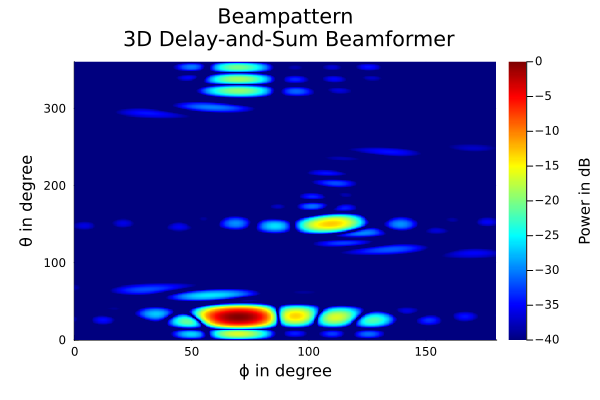

In [3]:
W = weights_pa3D'*BeamLib.steer(pa3D, fcenter, deg2rad.(azel))
W = reshape(W, length(θaxis), length(ϕaxis))
WdB = 20*log10.(abs.(W))

using Plots
import Measures
p1 = heatmap(ϕaxis,θaxis, WdB, cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\n 3D Delay-and-Sum Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("ϕ in degree")
ylabel!("θ in degree")

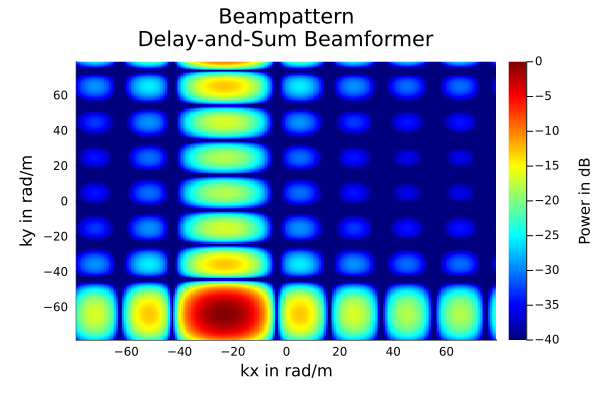

In [4]:
kxaxis = LinRange(-π/4e-2, π/4e-2, 256)
kyaxis = LinRange(-π/4e-2, π/4e-2, 256)  # Nyquist theorem with k_s = 2π/4cm and k_s/2 = π/4cm
kx, ky = meshgrid(kxaxis, kyaxis)
kaxis = vcat(vec(kx)', vec(ky)')
W = weights_pa2D'*BeamLib.steer(pa2D, fcenter, kaxis; coords=:k)
W = reshape(W, length(kxaxis), length(kyaxis))
WdB = 20*log10.(abs.(W))

using Plots
import Measures
p1 = heatmap(kxaxis, kyaxis, WdB, cmap = :jet, clim=(-40, 0))
plot!(title="Beampattern\nDelay-and-Sum Beamformer", cbar_title="\nPower in dB", margin=5*Measures.mm)
xlabel!("kx in rad/m")
ylabel!("ky in rad/m")